In [1]:
from sklearn.datasets import fetch_openml

# Download the dataset from openml
dataset = fetch_openml(data_id=42803, as_frame=True)

# Extract feature matrix X and show 5 random samples
df_X = dataset["frame"]

C:\Users\sfcab\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Show size of the dataset
df_X.shape

(363243, 67)

In [3]:
import pandas as pd

# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

float64    55
object      6
int64       6
dtype: int64

In [4]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

Accident_Index Sex_of_Driver        Date   Time Local_Authority_(Highway)  \
0  201501BS70001           1.0  12/01/2015  18:45                 E09000020   
1  201501BS70002           1.0  12/01/2015  07:50                 E09000020   
2  201501BS70004           1.0  12/01/2015  18:08                 E09000020   
3  201501BS70005           1.0  13/01/2015  07:40                 E09000020   
4  201501BS70008           1.0  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

In [5]:
# Changes data type of 'Sex_of_Driver'
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

In [6]:
df_X.describe(exclude="number")

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          363243      319866  319822                    319866   
unique         140056         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2972                      8457   

       LSOA_of_Accident_Location  
count                     298758  
unique                     25979  
top                    E01028497  
freq                        1456

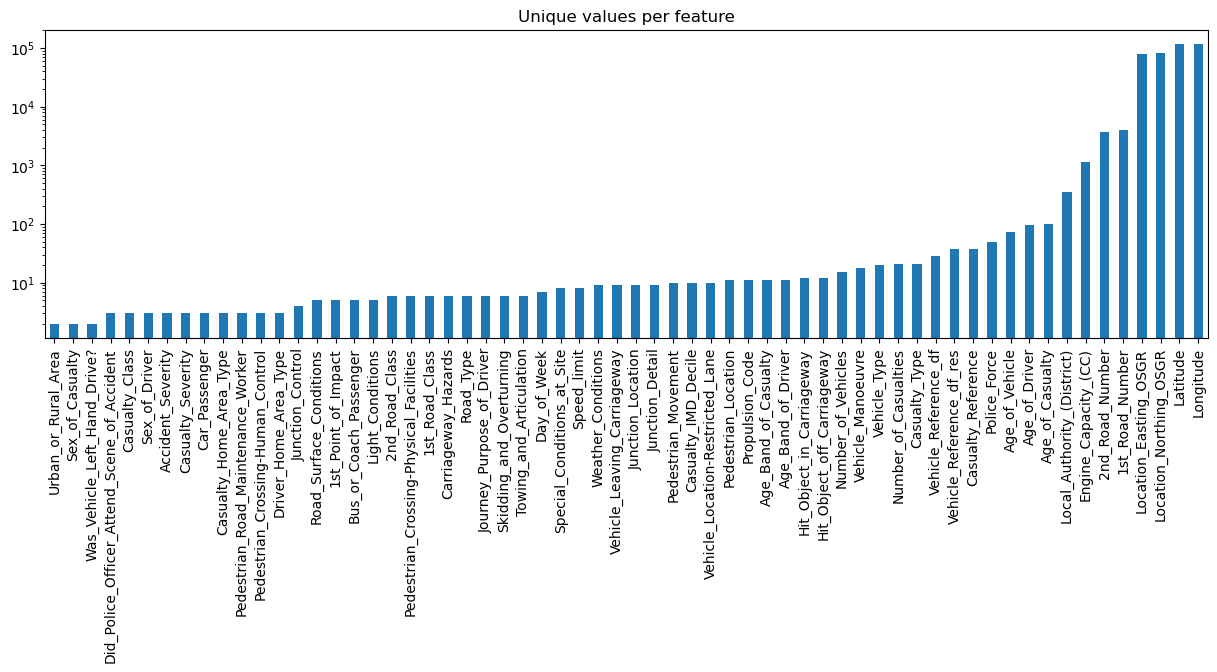

In [7]:
# For each numerical feature compute number of unique entries
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [8]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 22 duplicates in your database.


In [9]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 67)

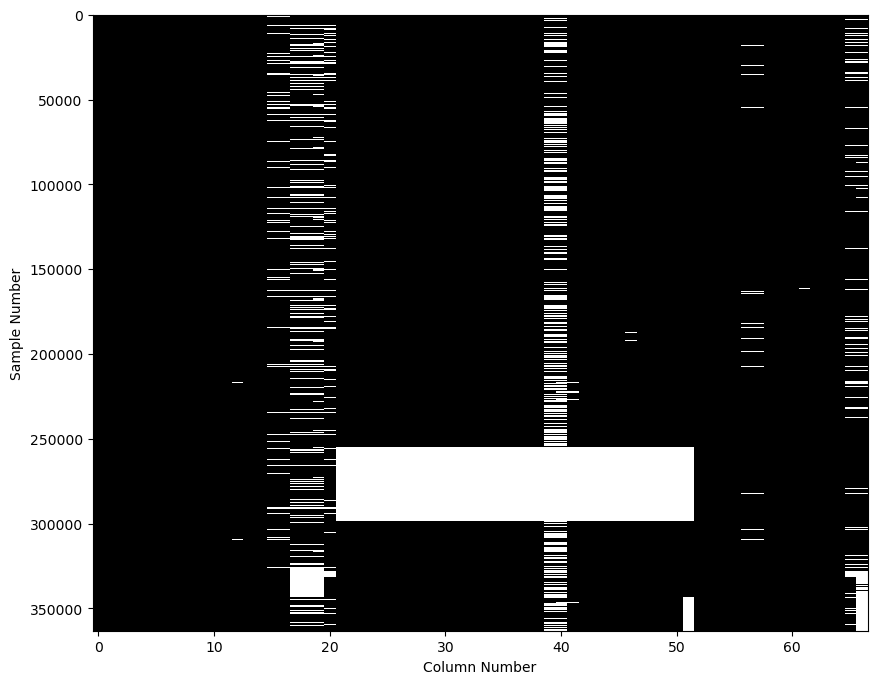

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_X.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

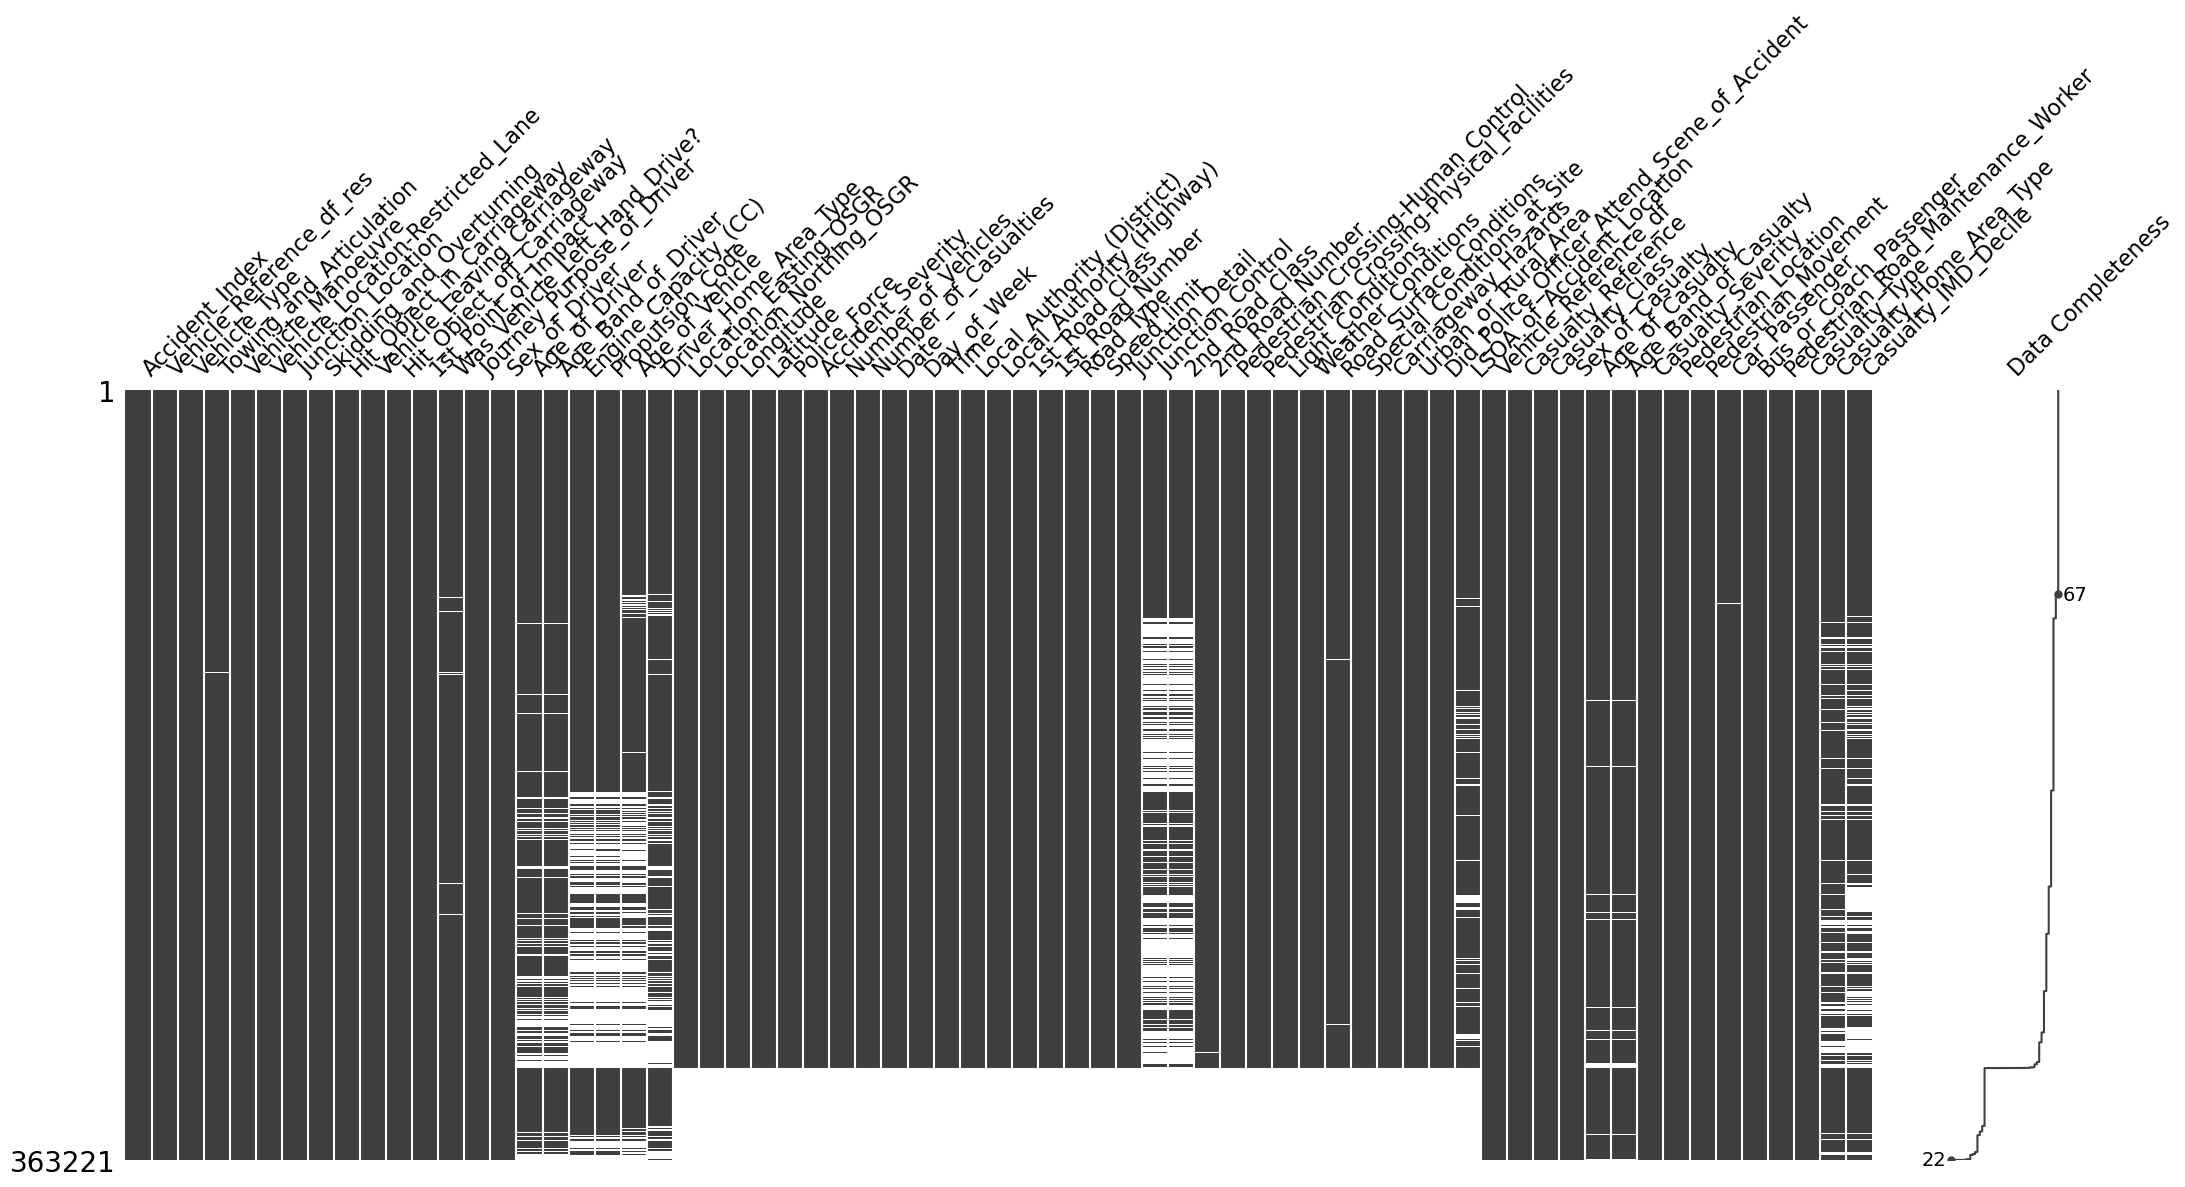

In [11]:
!pip install missingno
import missingno as msno

msno.matrix(df_X, labels=True, sort="descending");

In [12]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.80, axis=0).reset_index(drop=True)
df_X.shape

(319790, 67)

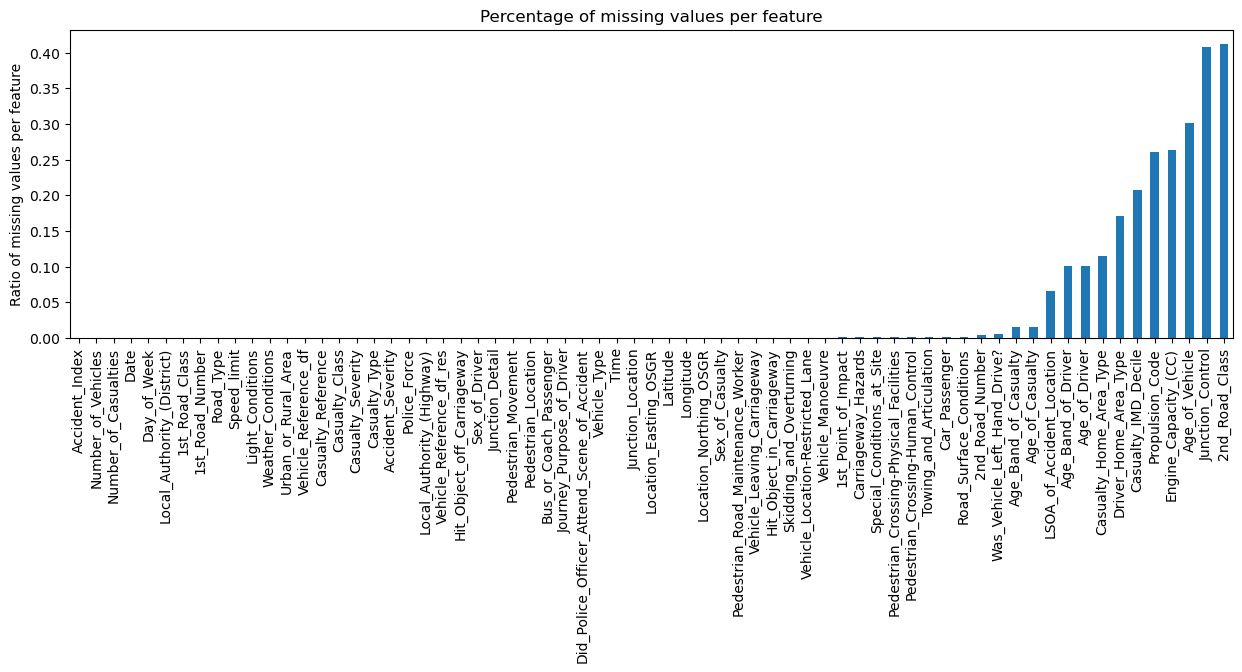

In [13]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [14]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319790, 60)

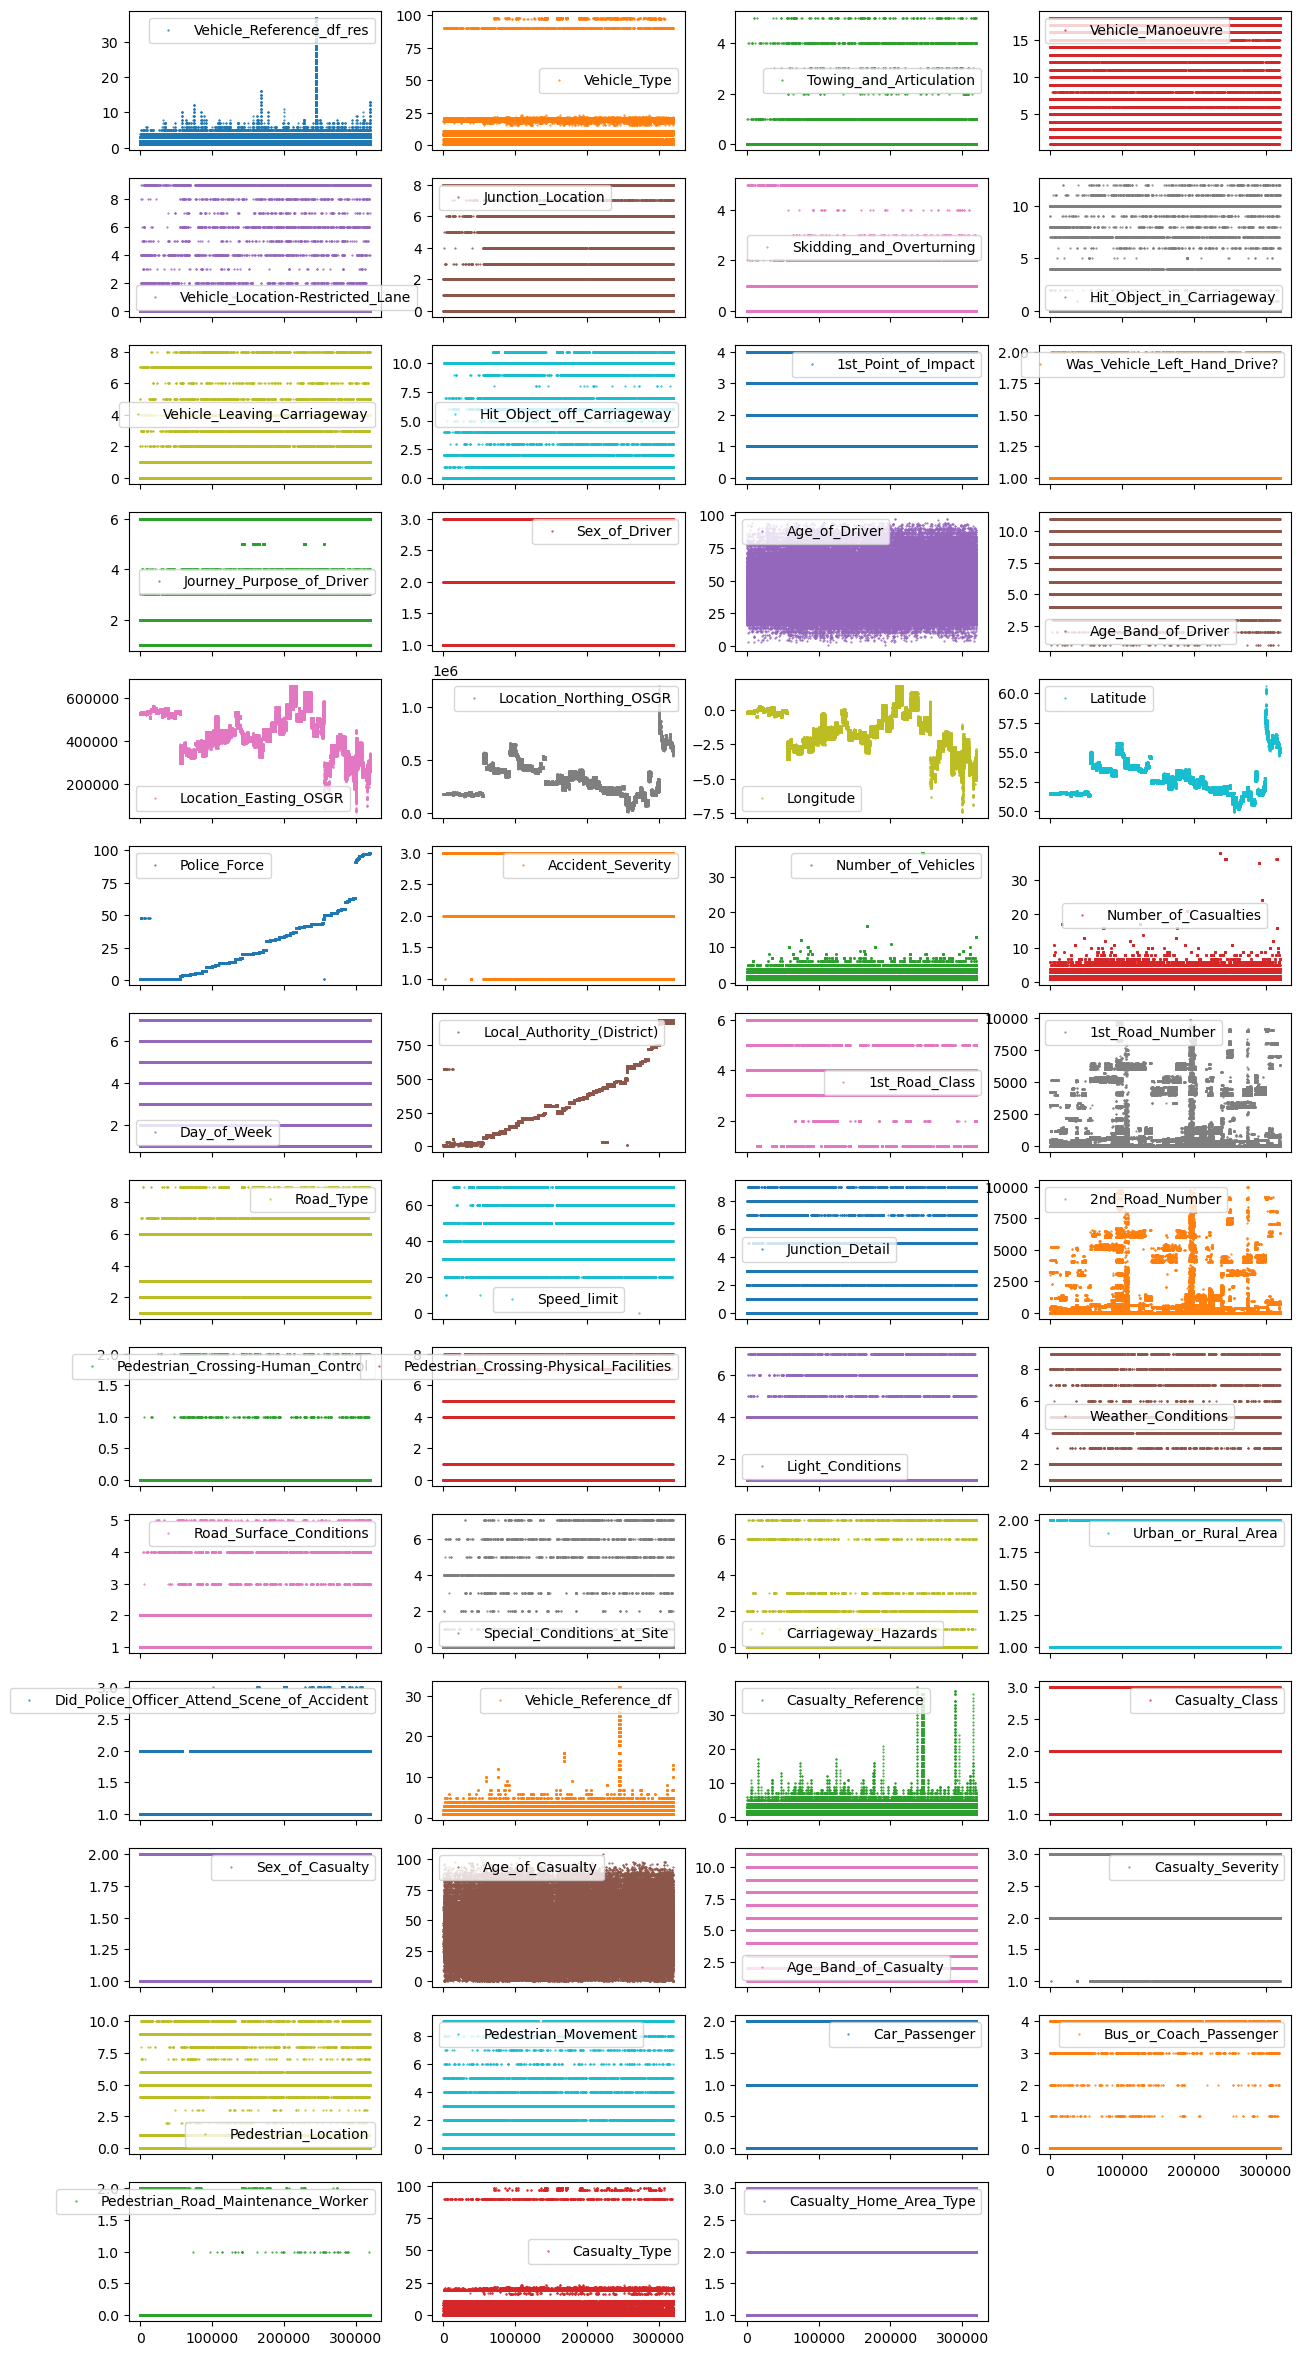

In [15]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);


In [16]:
# Extract descriptive properties of non-numerical features
df_X.describe(exclude=["number", "datetime"])

Accident_Index        Date    Time Local_Authority_(Highway)  \
count          319790      319790  319746                    319790   
unique         123645         365    1439                       204   
top     201543P296025  14/02/2015   17:30                 E10000017   
freq             1332        2144    2969                      8457   

       LSOA_of_Accident_Location  
count                     298693  
unique                     25977  
top                    E01028497  
freq                        1456

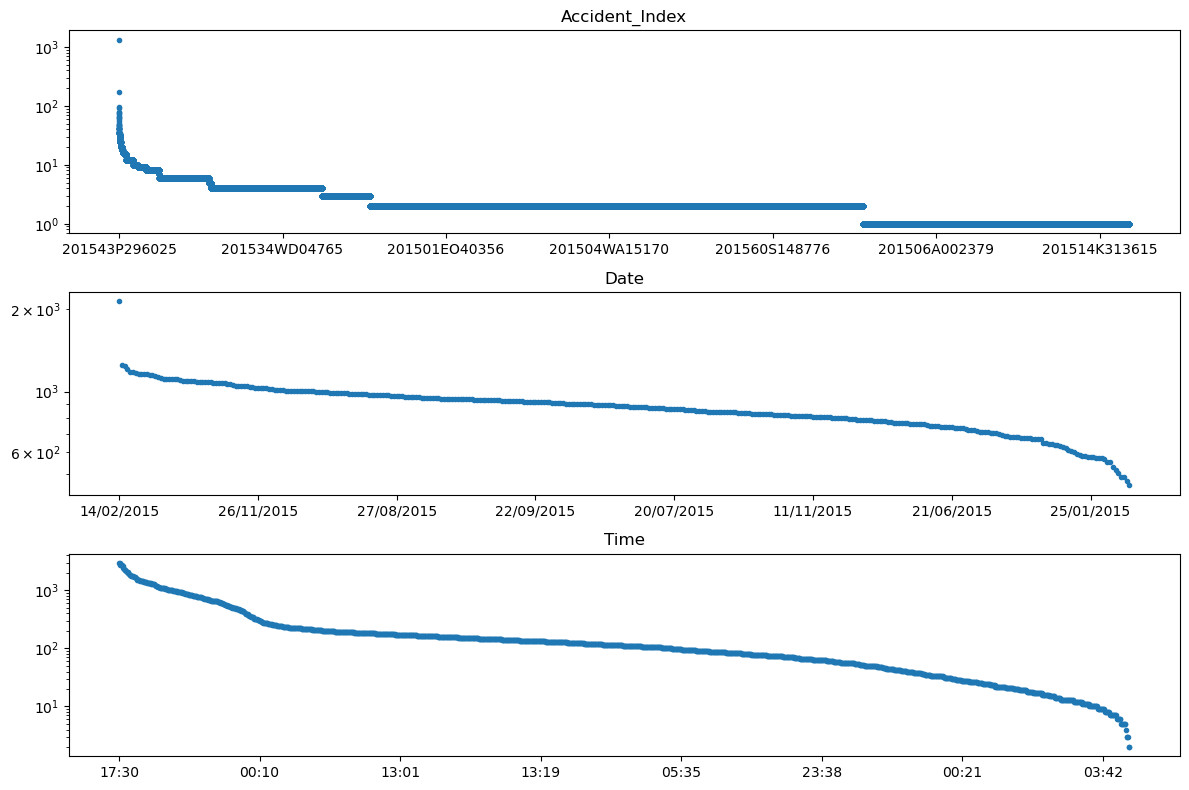

In [17]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [18]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index

# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317665, 60)

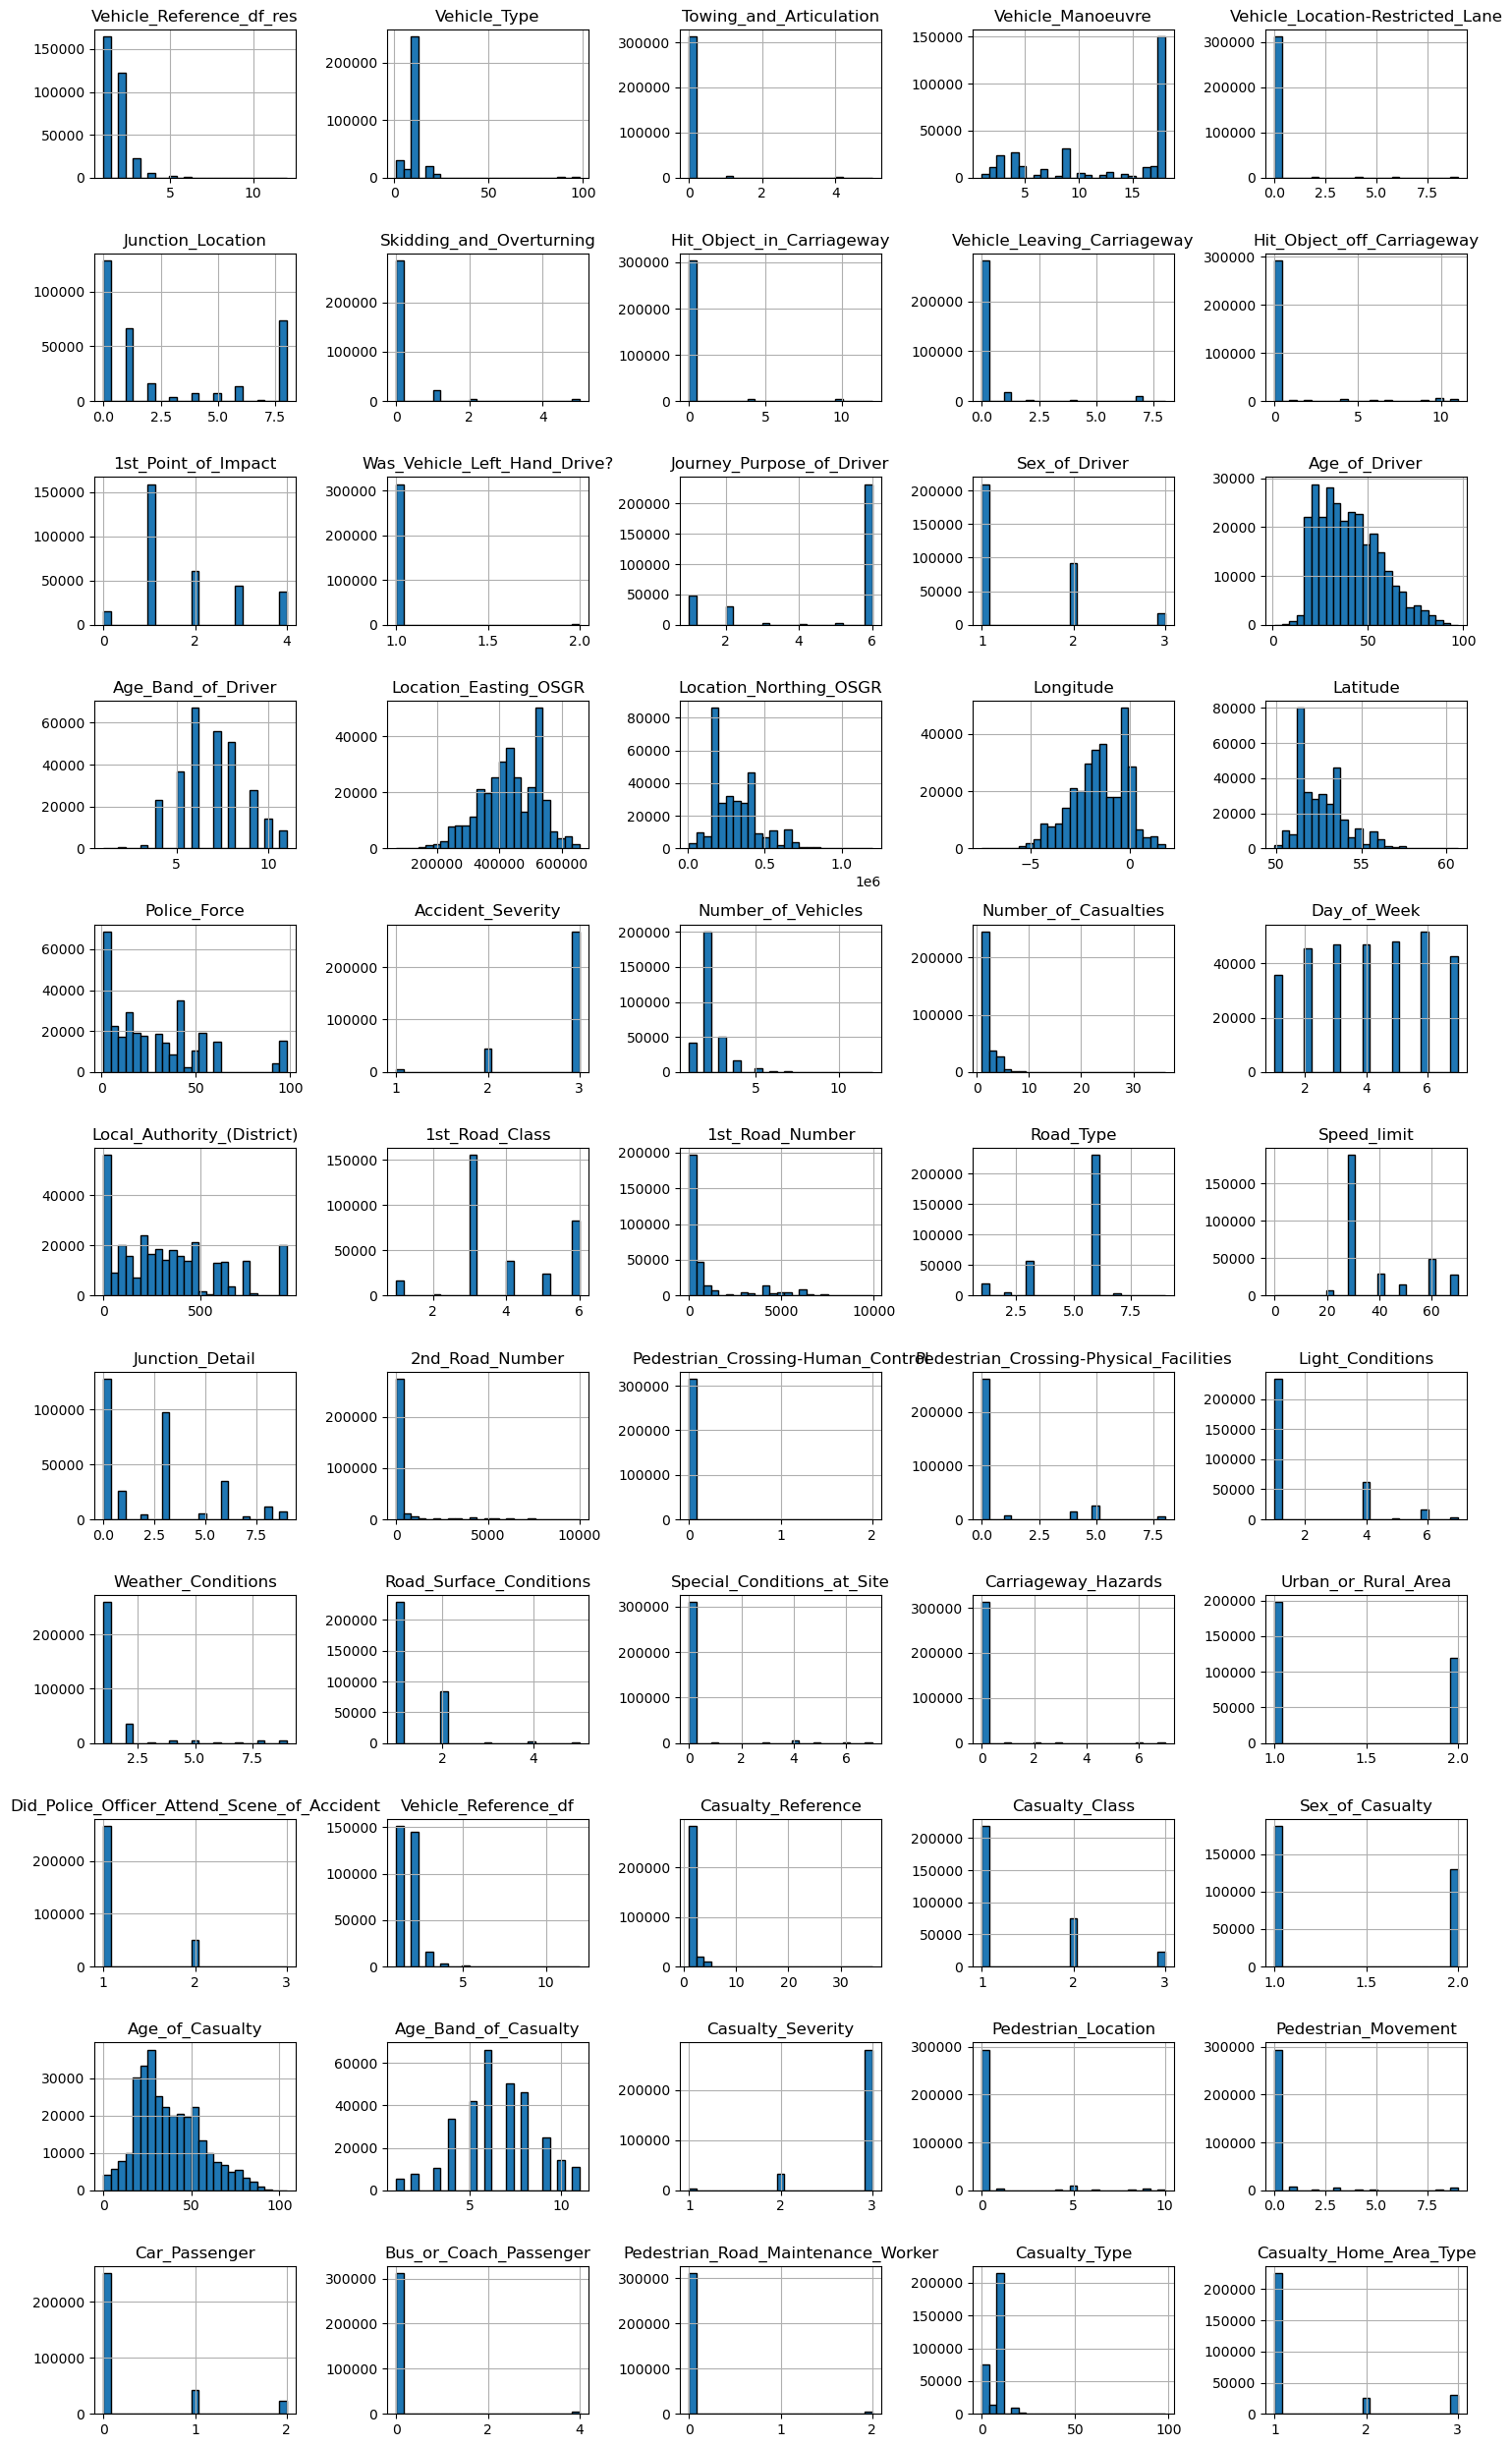

In [19]:
# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

Pedestrian_Crossing-Human_Control    0.995259
Was_Vehicle_Left_Hand_Drive?         0.990137
Carriageway_Hazards                  0.983646
Towing_and_Articulation              0.983221
Vehicle_Location-Restricted_Lane     0.982088
dtype: float64

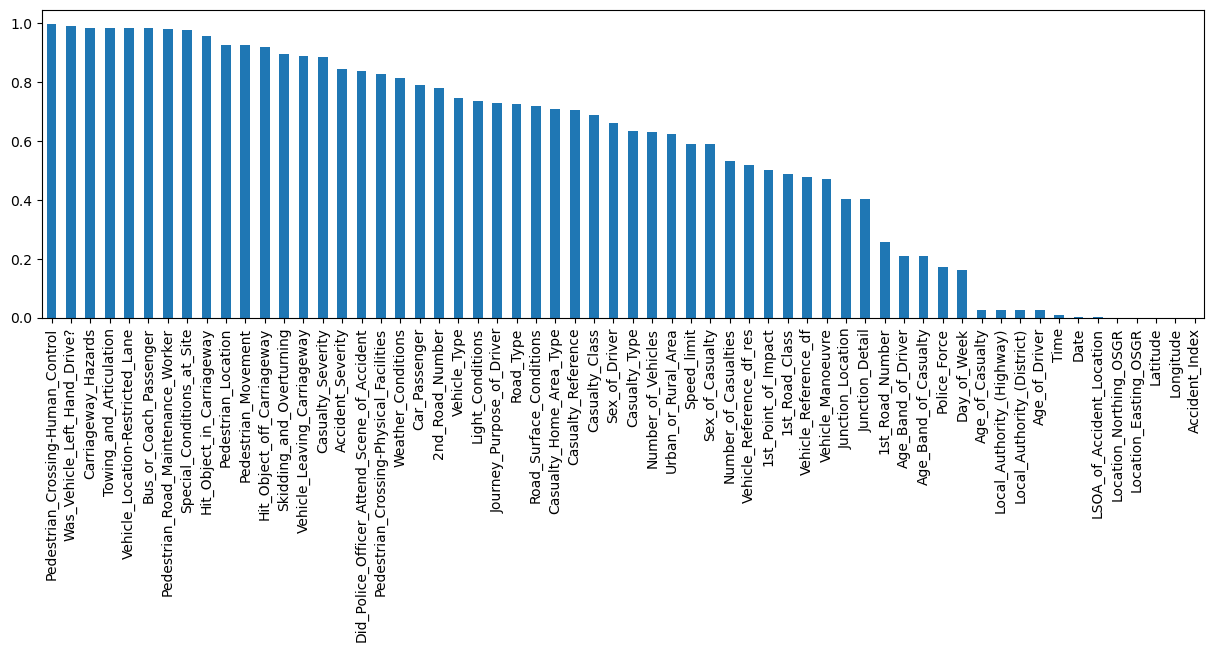

In [20]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

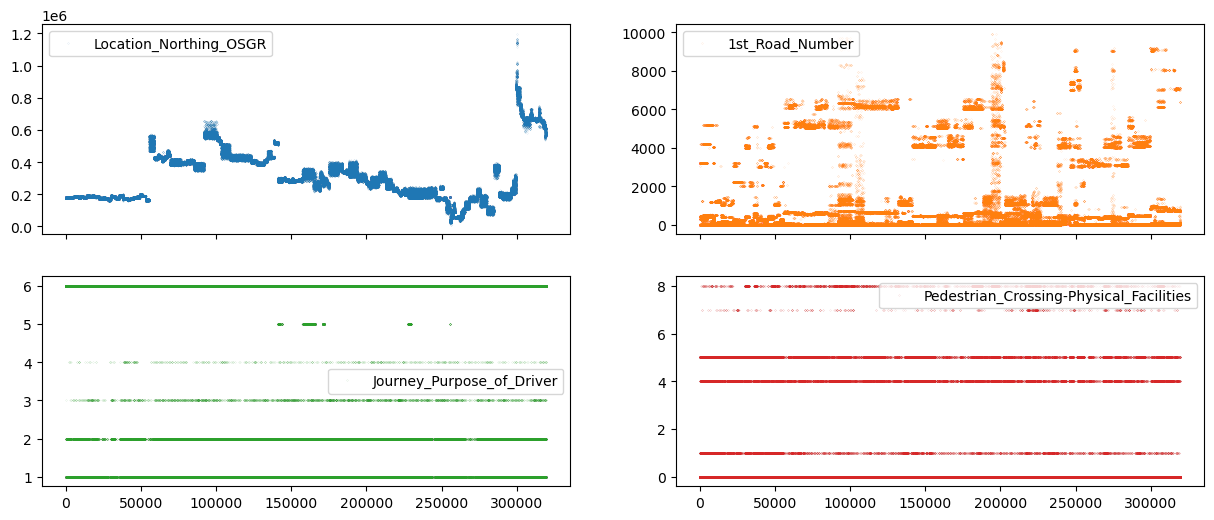

In [21]:
df_X[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6));

In [22]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

In [23]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(317665, 11)

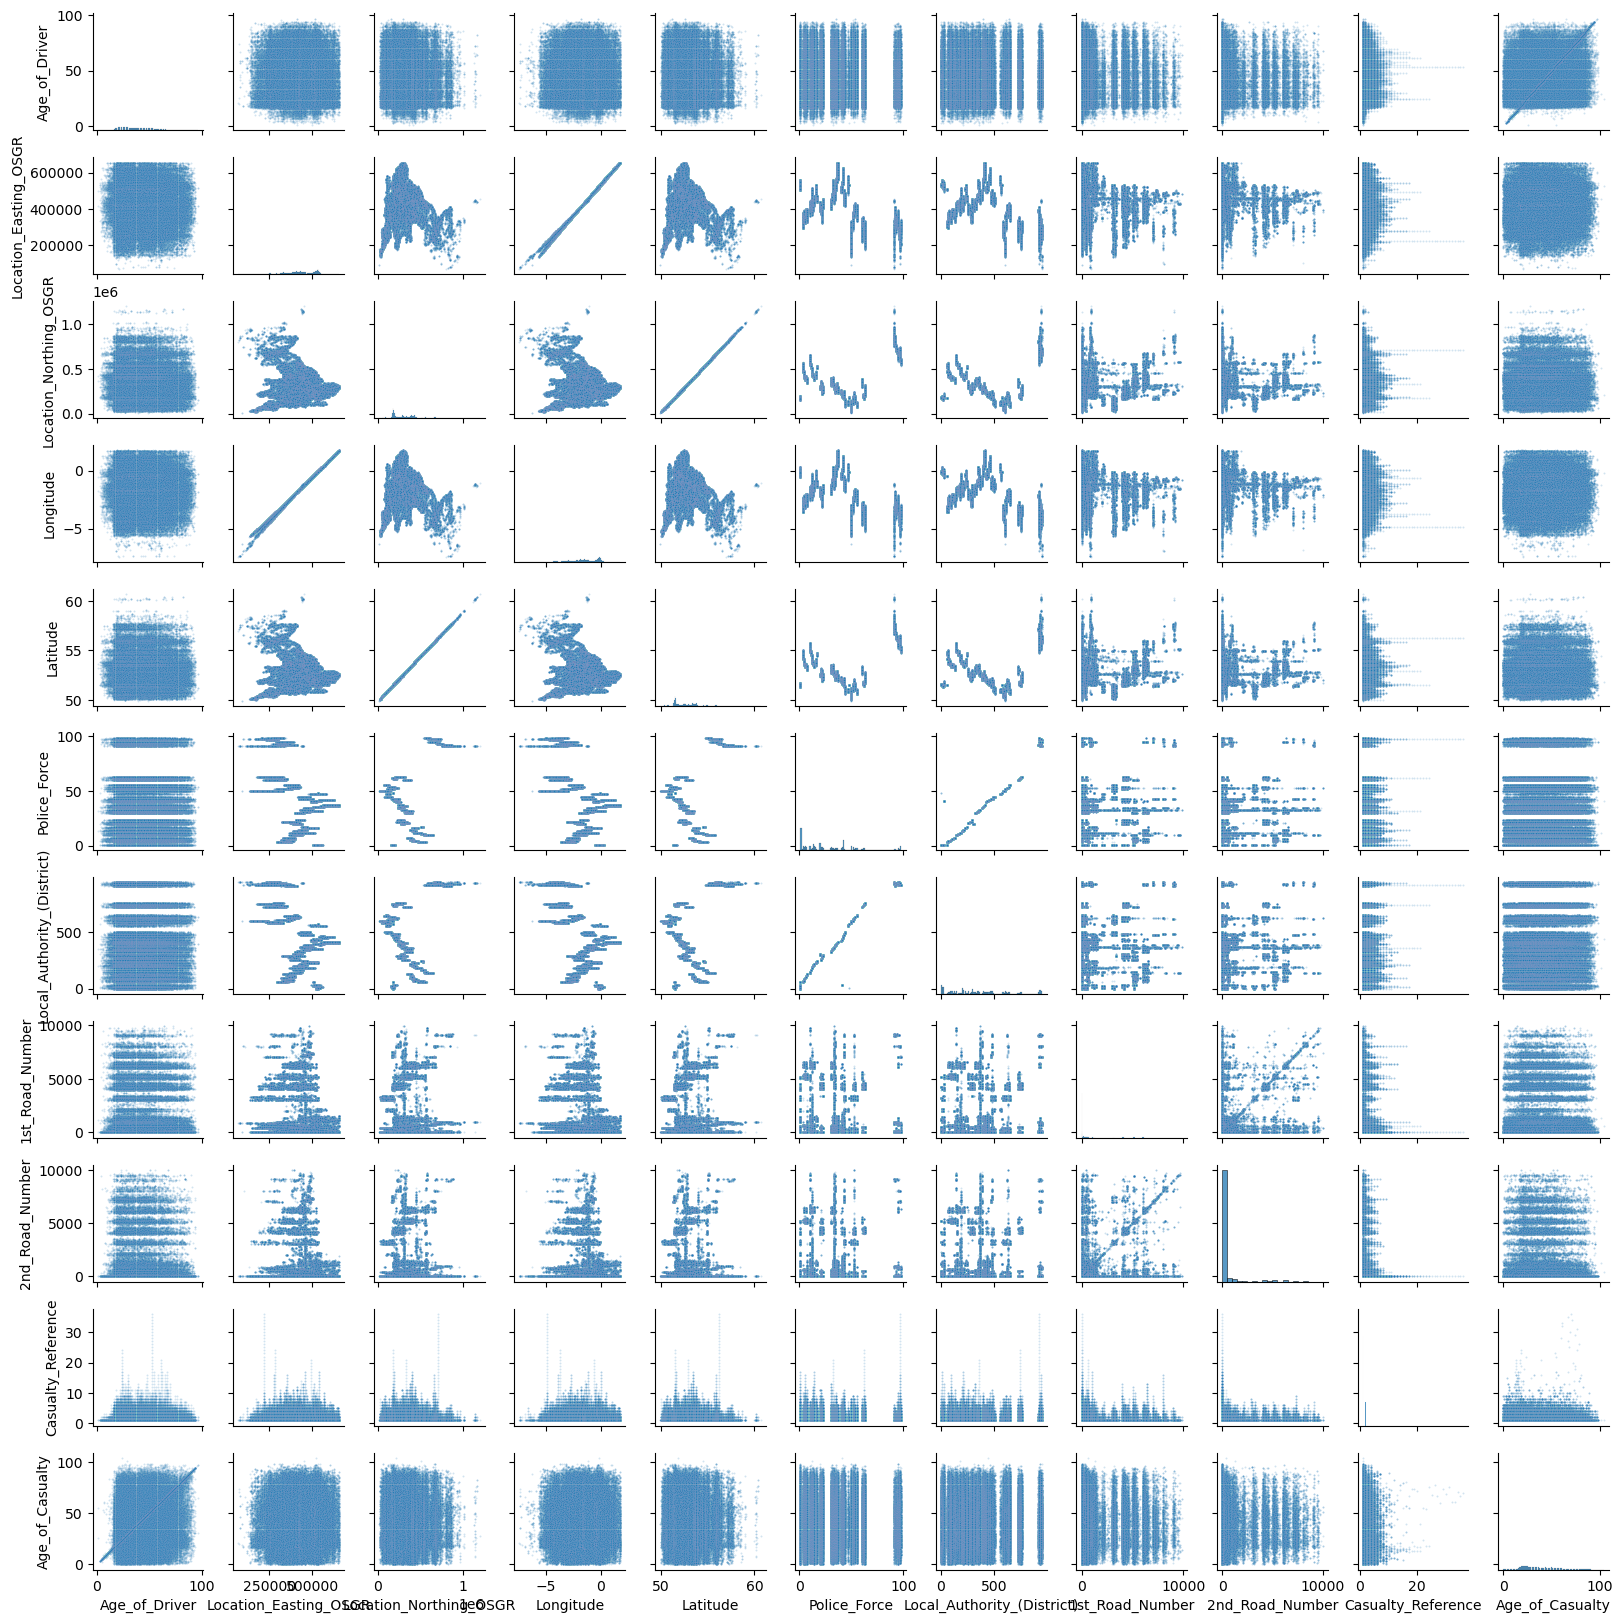

In [24]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

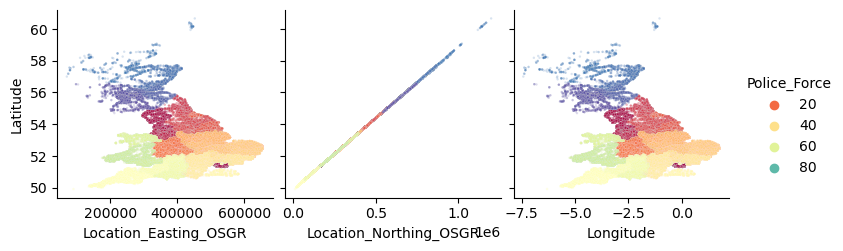

In [25]:
sns.pairplot(
    df_X, plot_kws={"s": 3, "alpha": 0.2}, hue="Police_Force", palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude");

In [26]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(317665, 44)

C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\2818465390.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\2818465390.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\2818465390.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\2818465390.py:16: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\2818465390.py:16: FutureWarning: Passi

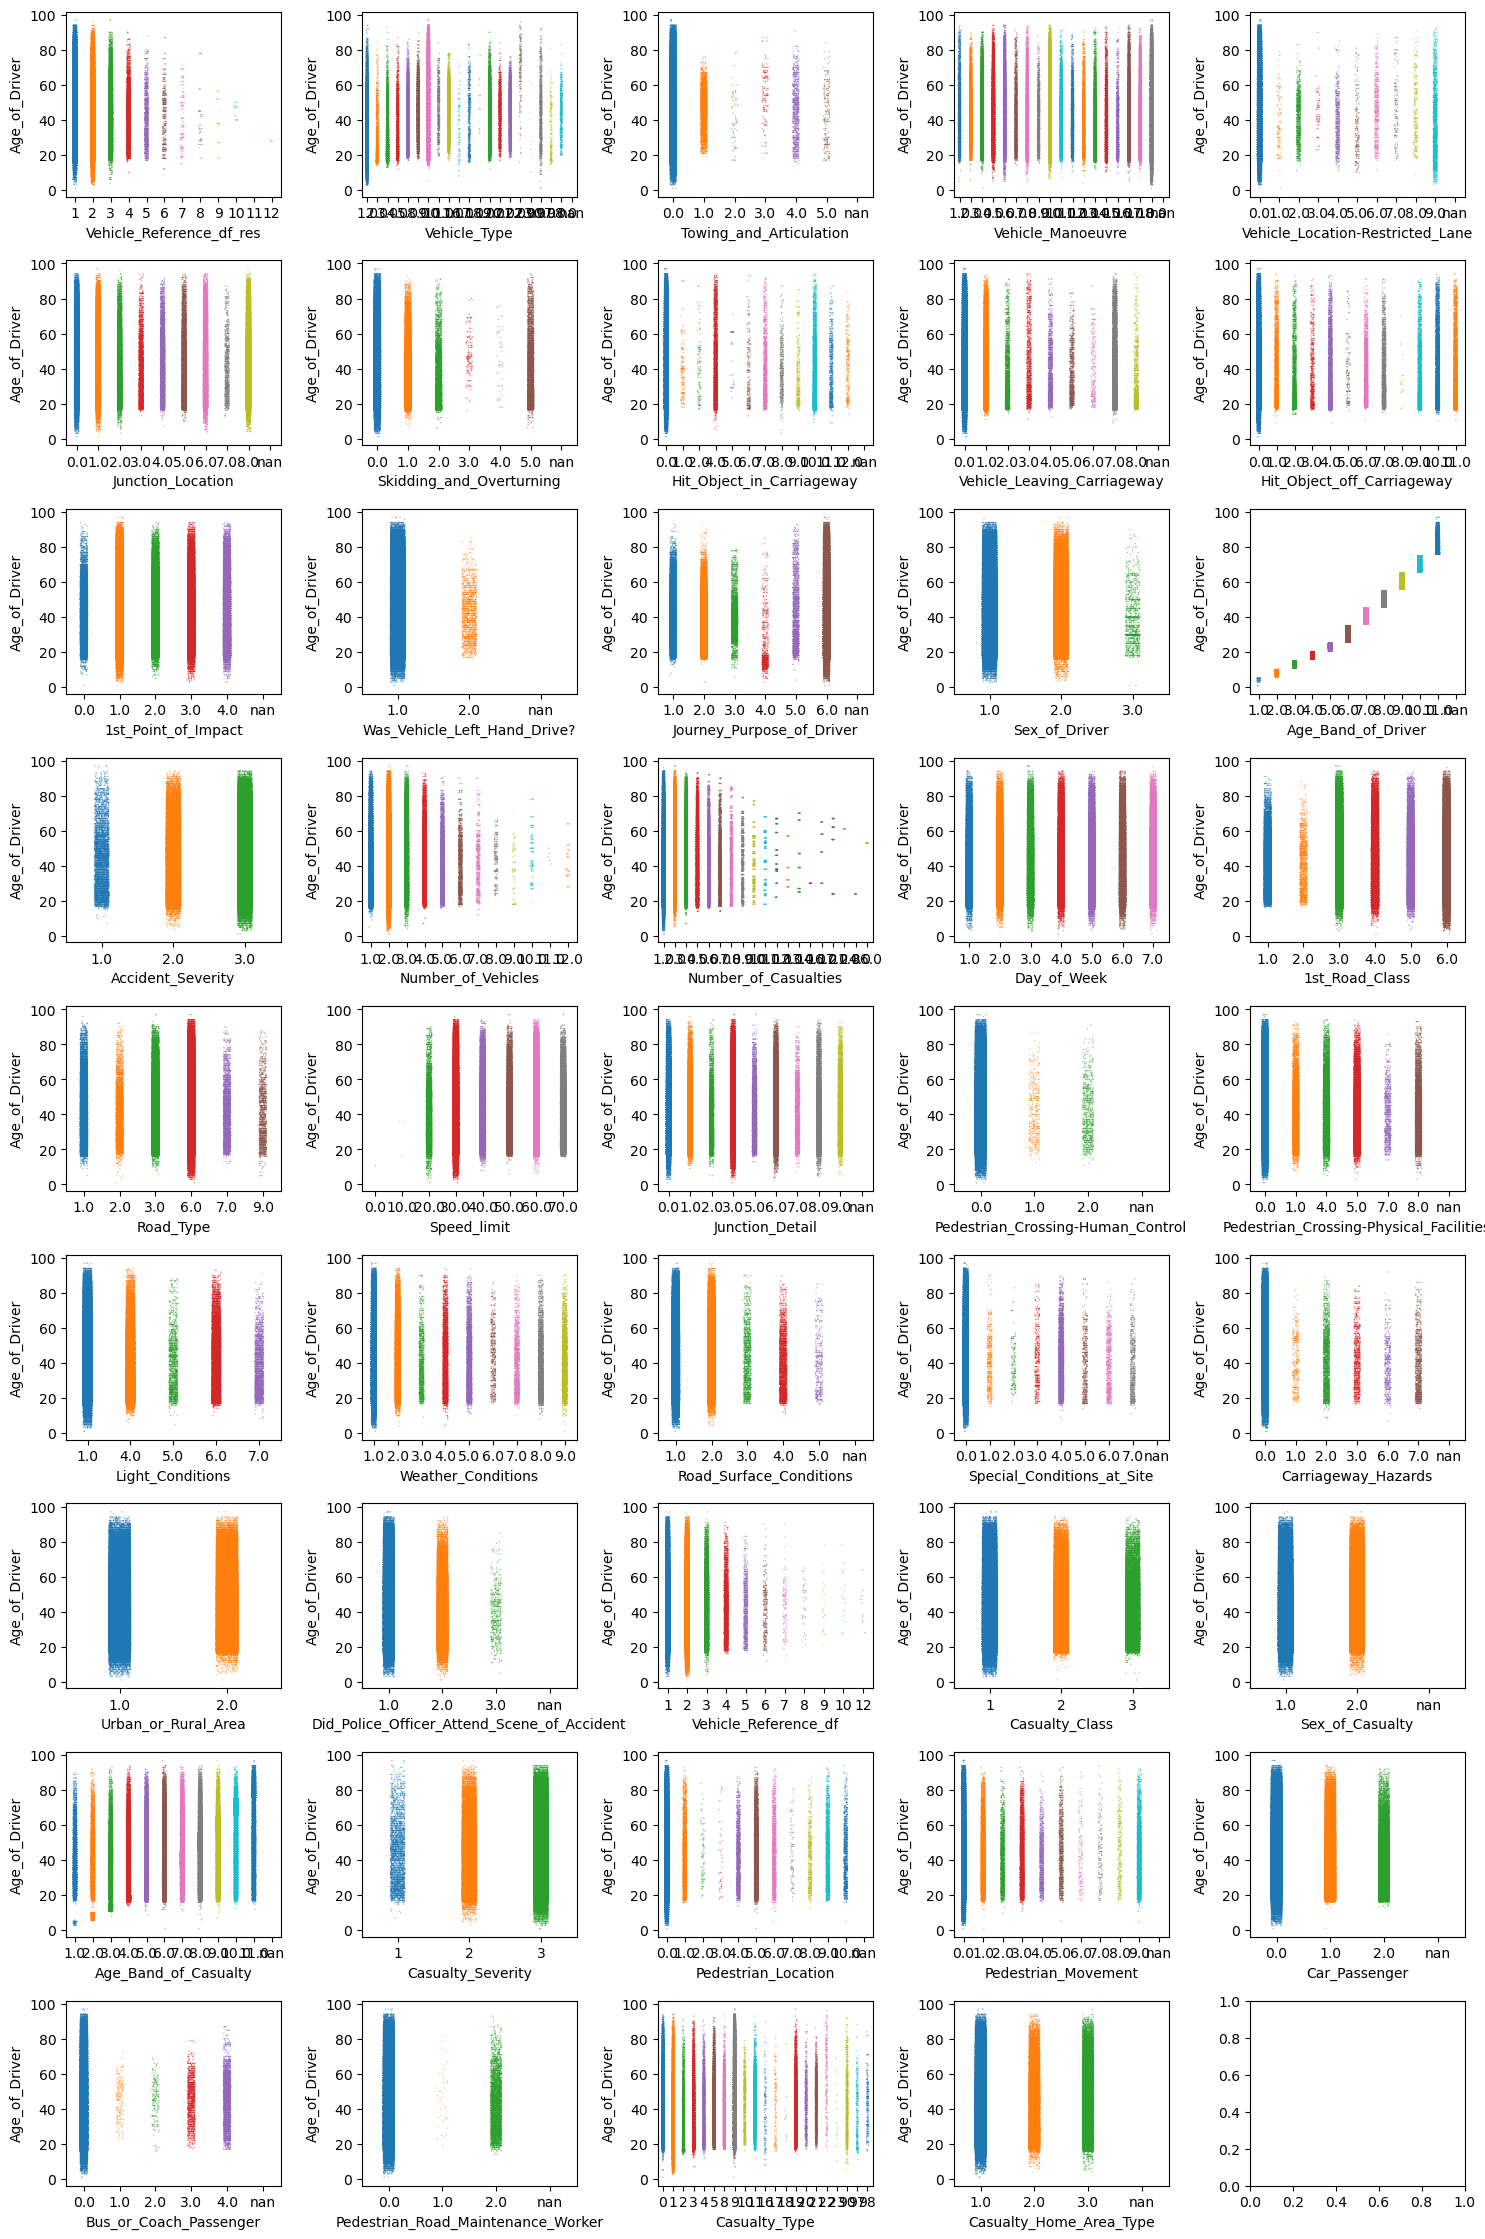

In [27]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\450225743.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\450225743.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\450225743.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\450225743.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\450225743.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,


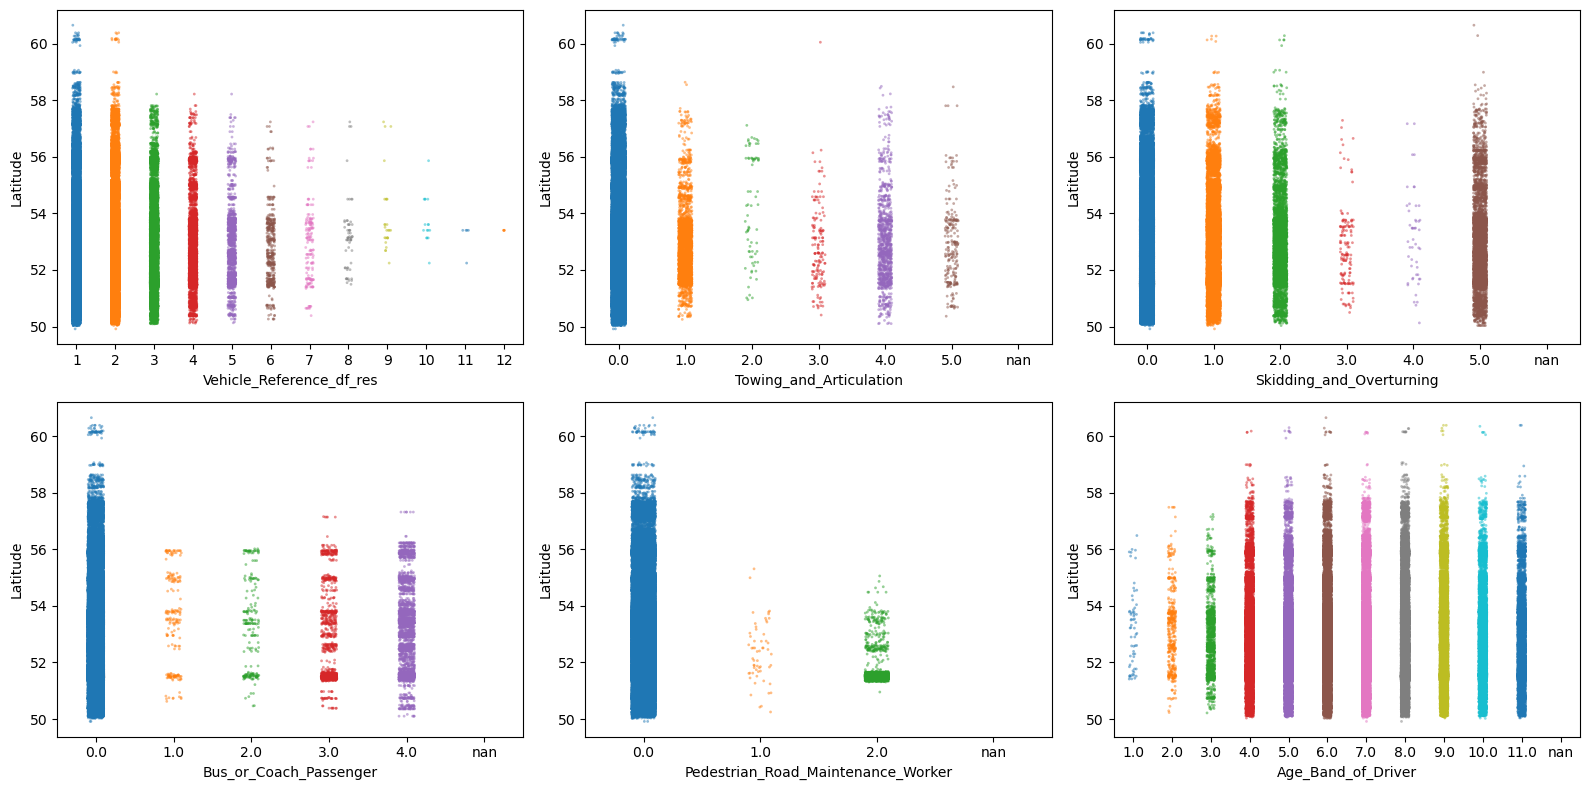

In [28]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "Age_Band_of_Driver"]

# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax,
                  palette="tab10", size=2, alpha=0.5)
plt.tight_layout();

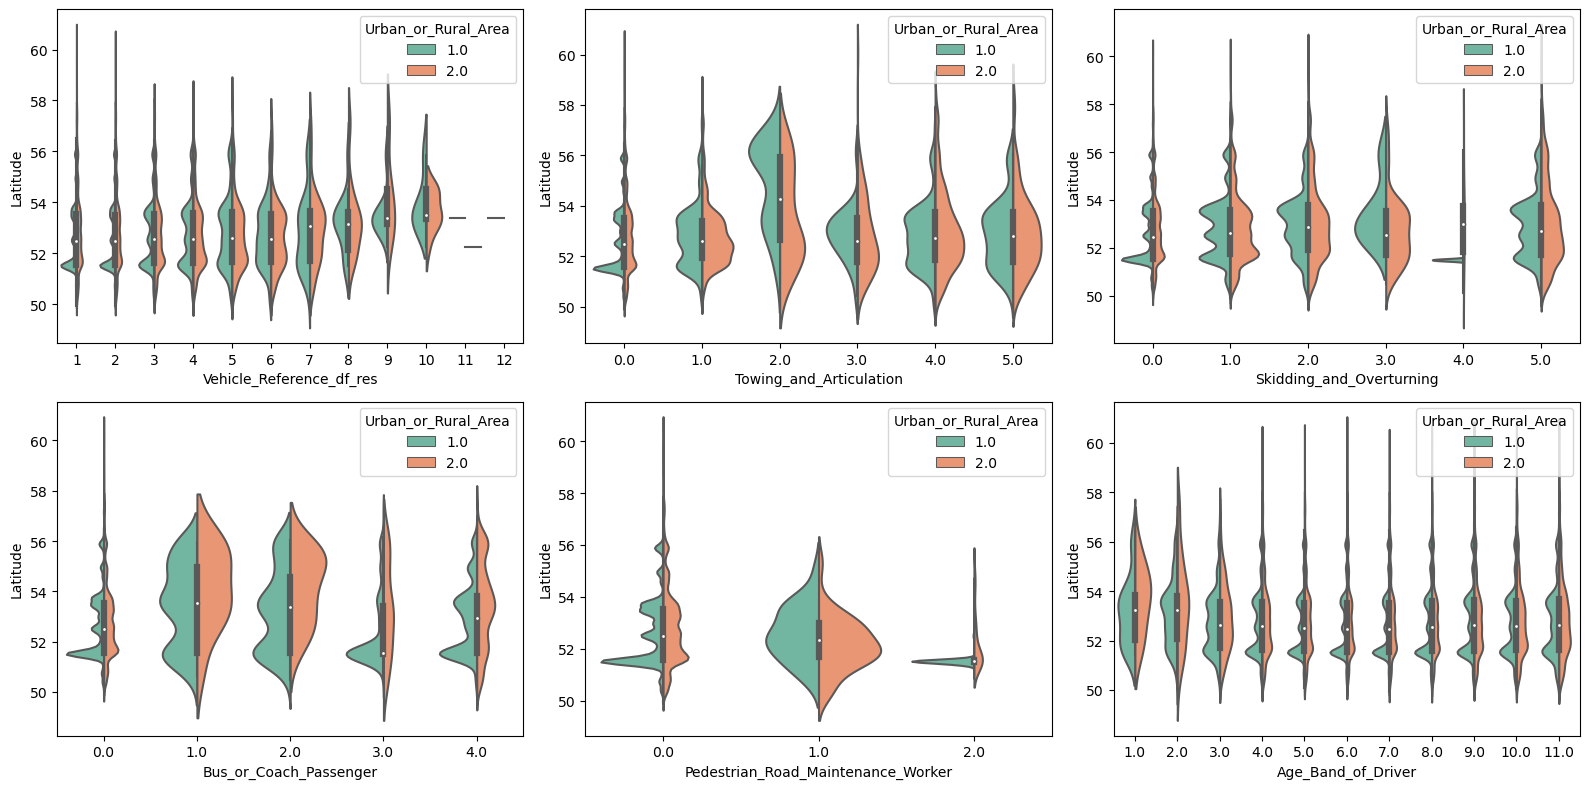

In [29]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(data=df_X, x=col, y=df_X["Latitude"], palette="Set2",
                   split=True, hue="Urban_or_Rural_Area", ax=ax)
plt.tight_layout();

In [30]:
# Computes feature correlation
df_corr = df_X.corr(method="pearson")

C:\Users\sfcab\AppData\Local\Temp\ipykernel_32932\1279958852.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_X.corr(method="pearson")


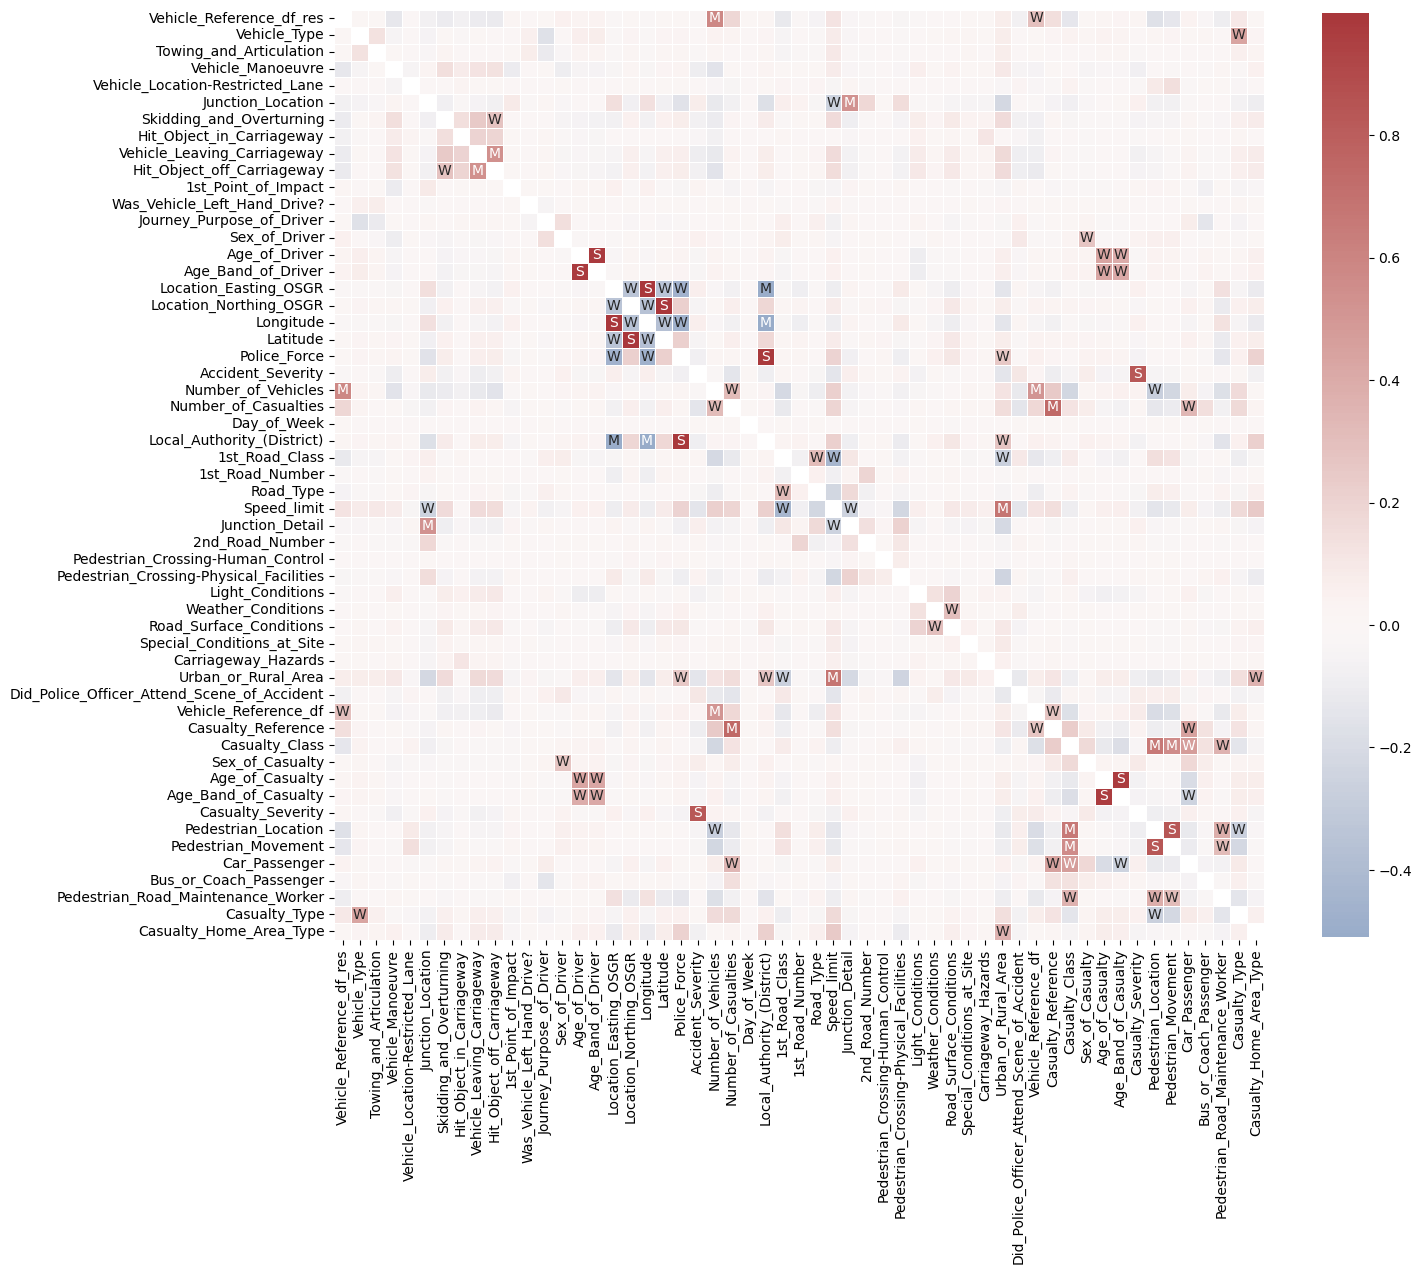

In [31]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [32]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Local_Authority_(District)  Longitude                -0.509343
                            Location_Easting_OSGR    -0.502919
Police_Force                Longitude                -0.471327
                            Location_Easting_OSGR    -0.461112
Speed_limit                 1st_Road_Class           -0.438931
                                                        ...   
Age_Band_of_Casualty        Age_of_Casualty           0.974397
Age_Band_of_Driver          Age_of_Driver             0.979019
Local_Authority_(District)  Police_Force              0.984819
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
Length: 1485, dtype: float64